# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
A: The coin with the heighest mean positive score is Ethereum with 0.076863.
2. Which coin had the highest negative score?
A: The coin with the highest negtive score is bitcoin with 0.0.226000.
3. Which coin had the highest positive score?
A: The coin with the highest positive score is bitcoin with 0.307000.

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
import alpaca_trade_api as tradeapi
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [3]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3322


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Bitcoin Mixer Designed to Bypass Money Laundering Laws Fined $60 Million for Bypassing Money Laundering Laws',
 'description': 'The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of “bitcoin mixers” Helix and Coin Ninja. The penalty is the first of its kind in the United States.Read more...',
 'url': 'https://gizmodo.com/bitcoin-mixer-designed-to-bypass-money-laundering-laws-1845424354',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/jhxr5xvmk7xprthwguhd.jpg',
 'publishedAt': '2020-10-20T15:40:00Z',
 'content': 'The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars]'}

In [4]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1150


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Luxury watch maker Breitling issues digital certificates on the Ethereum blockchain',
 'description': 'Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital passport that certifies the origin of the watch. Behind the…',
 'url': 'http://techcrunch.com/2020/10/15/luxury-watch-maker-breitling-issues-digital-certificates-on-the-ethereum-blockchain/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/10/Arianee.jpg?w=711',
 'publishedAt': '2020-10-15T09:44:51Z',
 'content': 'Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars]'}

In [5]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-10-20,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.154,0.846
1,2020-09-24,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
2,2020-10-19,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.000,0.198,0.802
3,2020-09-22,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
4,2020-10-19,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,-0.6597,0.000,0.203,0.797


In [6]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-10-15,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000
1,2020-09-30,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939
2,2020-10-14,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783
3,2020-10-02,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910
4,2020-10-14,Amazon is treating Prime members to an onslaug...,0.1779,0.046,0.000,0.954


In [7]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.073059,0.057740,0.045490,0.896802
std,0.424079,0.057097,0.065929,0.075295
min,-0.770300,0.000000,0.000000,0.713000
25%,-0.177325,0.000000,0.000000,0.860000
50%,0.114650,0.060500,0.000000,0.905500
75%,0.463275,0.090000,0.076000,0.946000
max,0.765000,0.213000,0.226000,1.000000


In [8]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.209533,0.076758,0.026337,0.896916
std,0.372197,0.072973,0.044506,0.081026
min,-0.743000,0.000000,0.000000,0.722000
25%,0.000000,0.000000,0.000000,0.840500
50%,0.226300,0.069000,0.000000,0.910000
75%,0.485300,0.126000,0.048500,0.950000
max,0.912000,0.278000,0.186000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The coin with the heighest mean positive score is Ethereum with 0.076863.

Q: Which coin had the highest compound score?

A: The coin with the highest compound score is Ethereum with 0.912000.

Q. Which coin had the highest positive score?

A: The coin with the highest positive score is bitcoin with 0.307000.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [10]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))
#sw_addons={}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    # Convert the words to lowercase
    sw = stopwords.words('english')
    lower = [word.lower() for word in words if word.lower() not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower]
    
    return tokens

In [12]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-10-20,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.154,0.846,"[financial, crime, enforcement, network, fince..."
1,2020-09-24,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935,"[image, copyrightchandler, guoimage, caption, ..."
2,2020-10-19,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.000,0.198,0.802,"[world, newsalexis, akwagyiramlagos, reuters, ..."
3,2020-09-22,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872,"[u, district, judge, sentenced, uk, national, ..."
4,2020-10-19,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,-0.6597,0.000,0.203,0.797,"[emerging, marketsalexis, akwagyiramlagos, reu..."


In [13]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-10-15,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000,"[breitling, partnering, arianee, issue, new, k..."
1,2020-09-30,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939,"[september, min, readopinions, expressed, entr..."
2,2020-10-14,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783,"[portion, global, economy, melted, emerging, a..."
3,2020-10-02,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,2020-10-14,Amazon is treating Prime members to an onslaug...,0.1779,0.046,0.000,0.954,"[amazon, treating, prime, member, onslaught, d..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
from collections import Counter
from nltk import ngrams

In [15]:
# Generate the Bitcoin N-grams where N=2
bitcoin_grams = Counter(ngrams(tokenizer(' '.join(bitcoin_df['text'])), n=2))
bitcoin_grams.most_common(20)

[(('satoshi', 'nakaboto'), 20),
 (('bitcoin', 'btc'), 12),
 (('digital', 'currency'), 10),
 (('char', 'robot'), 10),
 (('robot', 'colleague'), 10),
 (('colleague', 'satoshi'), 10),
 (('nakaboto', 'writes'), 10),
 (('writes', 'bitcoin'), 10),
 (('every', 'fucking'), 10),
 (('fucking', 'daywelcome'), 10),
 (('daywelcome', 'another'), 10),
 (('another', 'edition'), 10),
 (('edition', 'bitcoin'), 10),
 (('bitcoin', 'today'), 10),
 (('today', 'satoshi'), 10),
 (('nakaboto', 'tell'), 10),
 (('tell', 'whats'), 10),
 (('whats', 'going'), 10),
 (('going', 'bitcoin'), 10),
 (('bitcoin', 'char'), 10)]

In [16]:
# Generate the Ethereum N-grams where N=2
ethereum_grams = Counter(ngrams(tokenizer(' '.join(ethereum_df['text'])), n=2))
ethereum_grams.most_common(20)

[(('decentralized', 'finance'), 10),
 (('finance', 'defi'), 9),
 (('char', 'ethereum'), 8),
 (('char', 'bitcoin'), 6),
 (('bitcoin', 'btc'), 5),
 (('char', 'ethereums'), 4),
 (('ethereum', 'network'), 4),
 (('christine', 'kim'), 4),
 (('kim', 'spoke'), 4),
 (('ethereum', 'developer'), 4),
 (('invest', 'ethereum'), 4),
 (('smart', 'contract'), 3),
 (('btc', 'trading'), 3),
 (('trading', 'around'), 3),
 (('ethereum', 'miner'), 3),
 (('ethereum', 'economy'), 3),
 (('char', 'cryptocurrency'), 3),
 (('coindesks', 'christine'), 3),
 (('char', 'coindesk'), 3),
 (('coindesk', 'preparing'), 3)]

In [17]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [18]:
# Get the top 10 words for Bitcoin
processed_bitcoin = bitcoin_df["text"].str.cat()
bitcoin_tokenizer = tokenizer(processed_bitcoin)
bitcoin_10 = token_count(bitcoin_tokenizer)
bitcoin_10

[('bitcoin', 53),
 ('reuters', 35),
 ('satoshi', 20),
 ('nakaboto', 20),
 ('digital', 19),
 ('currency', 16),
 ('bank', 13),
 ('world', 13),
 ('every', 12),
 ('btc', 12)]

In [19]:
# Get the top 10 words for Ethereum
processed_ethereum = ethereum_df["text"].str.cat()
ethereum_tokenizer = tokenizer(processed_ethereum)
ethereum_10 = token_count(ethereum_tokenizer)
ethereum_10

[('ethereum', 49),
 ('bitcoin', 20),
 ('defi', 16),
 ('blockchain', 14),
 ('decentralized', 14),
 ('network', 13),
 ('new', 11),
 ('cryptocurrency', 11),
 ('btc', 10),
 ('finance', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

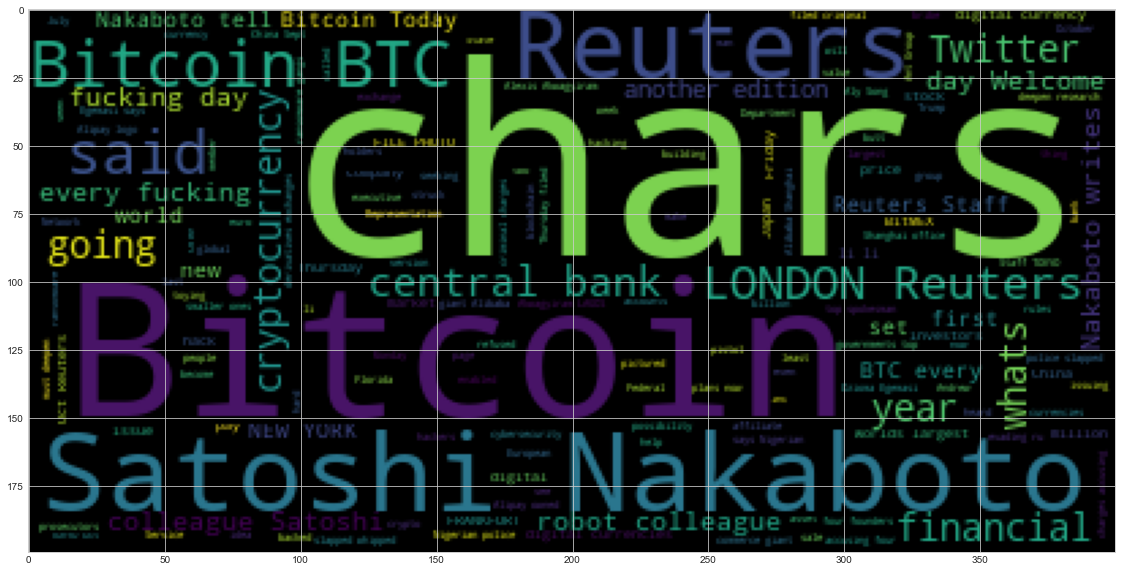

In [21]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(processed_bitcoin)
plt.imshow(bitcoin_wc)

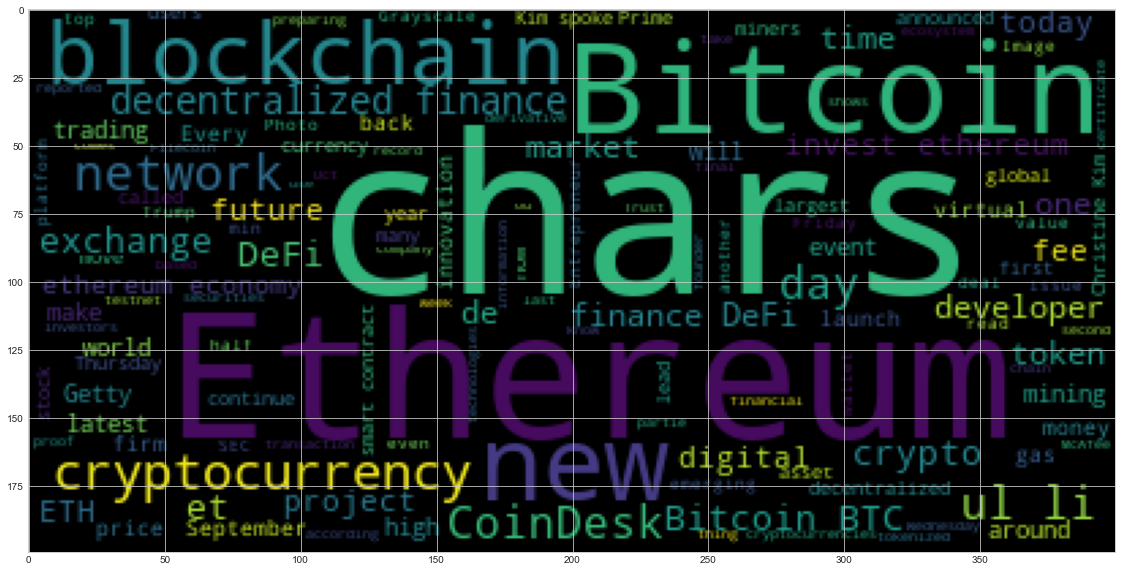

In [22]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(processed_ethereum)
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [23]:
import spacy
from spacy import displacy

In [24]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [26]:
# Concatenate all of the bitcoin text together
processed_bitcoin

'The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars]Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]World News\r\nAlexis Akwagyiram\r\nLAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the butt of a pistol when he refused to pay them a bribe. Then he heard them … [+6412 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the 

In [27]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(processed_bitcoin)

# Add a title to the document
bitcoin_doc.user_data['title']='Bitcoin NER'

In [28]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [29]:
# List all bitcoin Entities
bitcoin_entities = [ent.text for ent in bitcoin_doc.ents]
bitcoin_entities

['The Financial Crimes Enforcement Network',
 '$60 million',
 'Larry Dean Harmon',
 'Helix',
 'Coin Ninja',
 'first',
 'GuoImage',
 'Chandler Guo',
 'one',
 'Chandler Guo',
 'Reuters',
 'Ozioma Egemasi',
 'Nigerian',
 'US',
 'five years',
 'The Dark Overlord',
 'Nathan Wyatt',
 'Alexis Akwagyiram',
 'Reuters',
 'Ozioma Egemasi',
 'Nigerian',
 'first',
 'Parag Agrawal',
 'Twitter',
 'Travis Scot',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Reuters',
 'LONDON',
 'Reuters',
 'Bank of England',
 'Andrew Bailey',
 'Monday',
 'Bitcoin',
 'Reuters',
 'LONDON',
 'Reuters',
 'Bank of England',
 'Andrew Bailey',
 'Monday',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 

---

## Ethereum NER

In [30]:
# Concatenate all of the Ethereum text together
processed_ethereum

'Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars]September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars]Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the chaos.\r\nGrayscale Investments, the world\'s largest digital-currency… [+5397 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3081 chars]Amazon is treating Prime members to an onslaught of deals now that it\'s officially Prime Day. One discount could score you the Le

In [31]:
# Run the NER processor on all of the text
ethereum_doc = nlp(processed_ethereum)

# Add a title to the document
ethereum_doc.user_data['title']='Ethereum NER'

In [32]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [33]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_doc.ents]
ethereum_entities

['Arianee',
 '30',
 '2020',
 '8',
 'half',
 '2020',
 '2020',
 'Grayscale Investments',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Prime Day',
 'One',
 'the Ledger Nano S',
 '39.99',
 'chars]US',
 'Donald Trump',
 'First',
 'Lady Melania Trump',
 'the White House',
 'July 7, 2020',
 'JIM WATSON',
 'Getty Images',
 'Friday',
 'chars]Bitcoin',
 'an era',
 'Bitcoins',
 'SuperRare',
 'SuperRare',
 'GuoImage',
 'Chandler Guo',
 'one',
 'Chandler Guo',
 'SEC',
 'OCC',
 'fiat',
 'yesterday',
 'fiat',
 'this year',
 'CWT',
 'CWT',
 '13, 2020',
 '7 min',
 'today',
 'Yuriko Nakao',
 'Yesterday',
 'today',
 'Bitcoin',
 'One',
 'the Ledger Nano S',
 '39.99',
 'Bitcoin',
 'BTC',
 'Ethereum (',
 'ETH',
 'ETH',
 'BTC',
 '458,000',
 'September 25',
 'Shaun Fernando',
 'September 15, 2020',
 'the night',
 'USD',
 'the night',
 '+14419 chars]McAfee',
 'John McAfee',
 'Reuters',
 'U.S.',
 'Wednesday',
 'U.S.',
 'Wednesday',
 'U.S.',
 'Alvin H',
 'Ethereum',
 